In [1]:
using DataArrays,DataFrames
using PyPlot

INFO: Loading help data...


In [2]:
gcc_comp_s1 = readtable("resP1.txt",header = false,separator=',')

,x1,x2,x3,x4,x5,x6
1,0.073682,13.318974,static,1,-34302.1474765774,-2.524264460320227e6
2,0.081046,10.018162,static,2,-34302.1474765774,-2.524264460320227e6
3,0.074076,5.815889,static,4,-34302.1474765774,-2.524264460320227e6
4,0.074839,4.804029,static,8,-34302.1474765774,-2.524264460320227e6
5,0.078798,6.455987,static,16,-34302.1474765774,-2.524264460320227e6
6,0.085698,10.57637,static,32,-34302.1474765774,-2.524264460320227e6
7,0.101753,12.39276,static,64,-34302.1474765774,-2.524264460320227e6
8,0.072804,8.054486,dynamic,1,-34302.1474765774,-2.524264460320227e6
9,0.072282,7.286735,dynamic,2,-34302.1474765774,-2.524264460320227e6
10,0.072766,6.145638,dynamic,4,-34302.1474765774,-2.524264460320227e6


In [3]:
bestloop1 = gcc_comp_s1[gcc_comp_s1[1] .== minimum(gcc_comp_s1[1]),:];
bestloop2 = gcc_comp_s1[gcc_comp_s1[2] .== minimum(gcc_comp_s1[2]),:];

In [4]:
bestloop1

,x1,x2,x3,x4,x5,x6
1,0.0711,5.291968,dynamic,16,-34302.1474765774,-2.524264460320227e6


In [5]:
bestloop2

,x1,x2,x3,x4,x5,x6
1,0.071532,3.757006,dynamic,8,-34302.1474765774,-2.524264460320227e6


In [6]:
staticgcc = gcc_comp_s1[gcc_comp_s1[3] .== "static" ,:]
dynamicgcc = gcc_comp_s1[gcc_comp_s1[3] .== "dynamic",:]
guidedgcc = gcc_comp_s1[gcc_comp_s1[3] .== "guided",:]

,x1,x2,x3,x4,x5,x6
1,0.137053,13.774531,guided,1,-34302.1474765774,-2.524264460320227e6
2,0.129763,13.95421,guided,2,-34302.1474765774,-2.524264460320227e6
3,0.130867,13.523809,guided,4,-34302.1474765774,-2.524264460320227e6
4,0.128475,13.732236,guided,8,-34302.1474765774,-2.524264460320227e6
5,0.127999,13.452082,guided,16,-34302.1474765774,-2.524264460320227e6
6,0.128502,13.651451,guided,32,-34302.1474765774,-2.524264460320227e6
7,0.128353,13.91138,guided,64,-34302.1474765774,-2.524264460320227e6


In [7]:
staticgcc = staticgcc[~isna(staticgcc[4]),:]

,x1,x2,x3,x4,x5,x6
1,0.073682,13.318974,static,1,-34302.1474765774,-2.524264460320227e6
2,0.081046,10.018162,static,2,-34302.1474765774,-2.524264460320227e6
3,0.074076,5.815889,static,4,-34302.1474765774,-2.524264460320227e6
4,0.074839,4.804029,static,8,-34302.1474765774,-2.524264460320227e6
5,0.078798,6.455987,static,16,-34302.1474765774,-2.524264460320227e6
6,0.085698,10.57637,static,32,-34302.1474765774,-2.524264460320227e6
7,0.101753,12.39276,static,64,-34302.1474765774,-2.524264460320227e6


In [24]:
dynamicgcc[dynamicgcc[2].==minimum(dynamicgcc[2]),:]

,x1,x2,x3,x4,x5,x6
1,0.071532,3.757006,dynamic,8,-34302.1474765774,-2.524264460320227e6


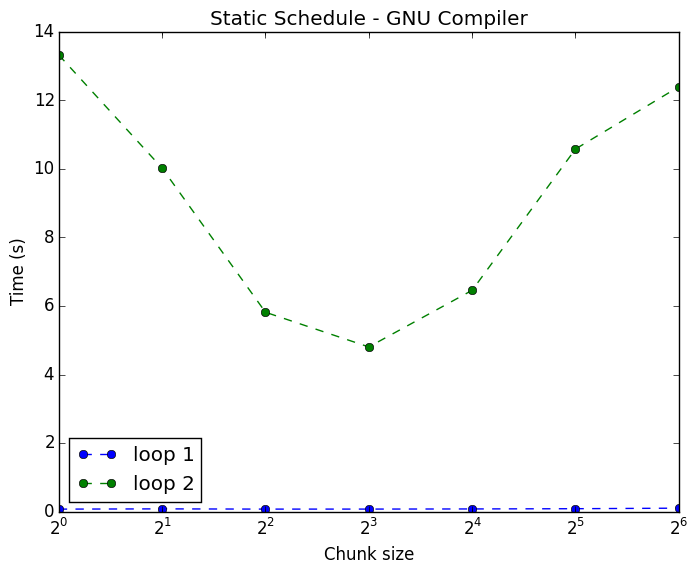

PyObject <matplotlib.text.Text object at 0x113a5a650>

In [8]:
semilogx(staticgcc[4],staticgcc[1],label = "loop 1",linestyle = "--",marker = "o",basex=2)
semilogx(staticgcc[4],staticgcc[2],label = "loop 2",linestyle = "--",marker = "o",basex=2)
title("Static Schedule - GNU Compiler")
legend(loc=0)
xlabel("Chunk size")
ylabel("Time (s)")

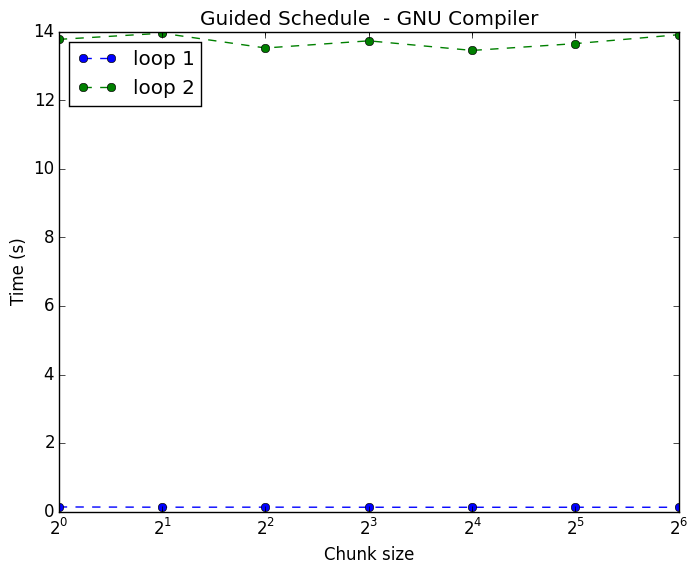

PyObject <matplotlib.text.Text object at 0x113dbd050>

In [9]:
semilogx(guidedgcc[4],guidedgcc[1],label = "loop 1",linestyle = "--",marker = "o",basex=2)
semilogx(guidedgcc[4],guidedgcc[2],label = "loop 2",linestyle = "--",marker = "o",basex=2)
title("Guided Schedule  - GNU Compiler")
legend(loc=0)
xlabel("Chunk size")
ylabel("Time (s)")

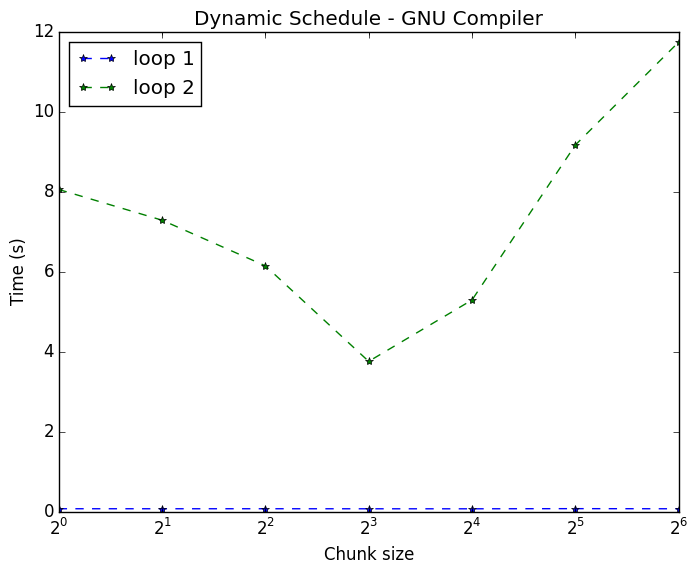

PyObject <matplotlib.text.Text object at 0x114094950>

In [10]:
semilogx(dynamicgcc[4],dynamicgcc[1],label = "loop 1",linestyle = "--",marker = "*",basex=2)
semilogx(dynamicgcc[4],dynamicgcc[2],label = "loop 2",linestyle = "--",marker = "*",basex=2)
title("Dynamic Schedule - GNU Compiler")
legend(loc = 0)
xlabel("Chunk size")
ylabel("Time (s)")

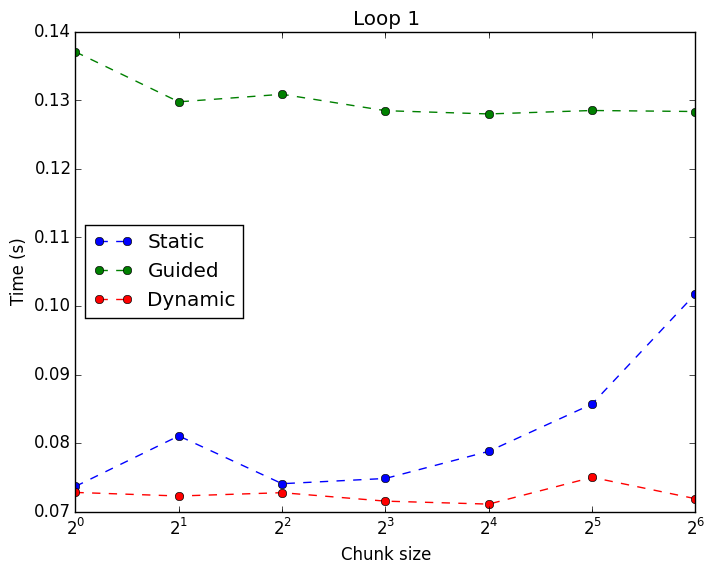

In [11]:
semilogx(staticgcc[4],staticgcc[1],label = "Static",linestyle = "--",marker = "o",basex=2)
semilogx(guidedgcc[4],guidedgcc[1],label = "Guided",linestyle = "--",marker = "o",basex=2)
semilogx(dynamicgcc[4],dynamicgcc[1],label = "Dynamic",linestyle = "--",marker = "o",basex=2)
title("Loop 1")
legend(loc = 0)
xlabel("Chunk size")
ylabel("Time (s)")
savefig("loop1.eps")

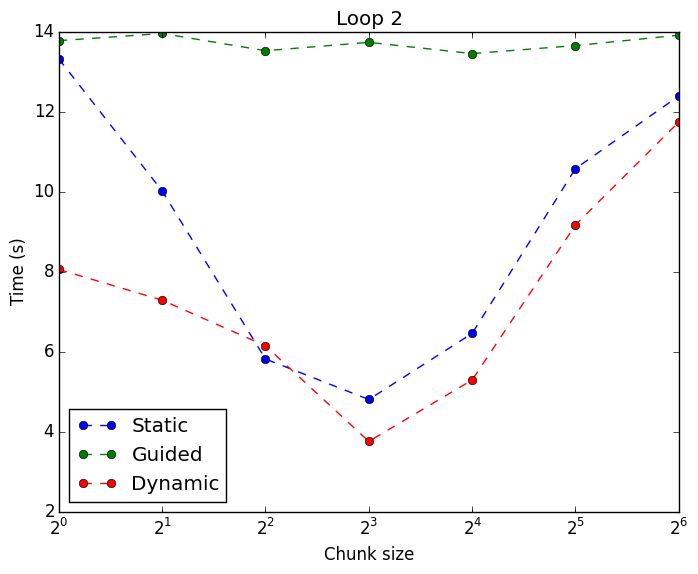

In [12]:
semilogx(staticgcc[4],staticgcc[2],label = "Static",linestyle = "--",marker = "o",basex=2)
semilogx(guidedgcc[4],guidedgcc[2],label = "Guided",linestyle = "--",marker = "o",basex=2)
semilogx(dynamicgcc[4],dynamicgcc[2],label = "Dynamic",linestyle = "--",marker = "o",basex=2)
title("Loop 2")
legend(loc = 0)
xlabel("Chunk size")
ylabel("Time (s)")
savefig("loop2.eps")

In [13]:
P1_byT = readtable("thread_res.txt",header = false)
P1_byT[1] = P1_byT[1,1]./P1_byT[1]
P1_byT[2] = P1_byT[1,2]./P1_byT[2]

6-element DataArray{Float64,1}:
 1.0    
 1.99063
 2.91708
 5.54074
 7.56783
 5.56704

In [30]:
P1_byT

,x1,x2,x3,x4,x5
1,0.395122,20.658573,-34302.1474765774,-2.524264460320227e6,1
2,0.200834,10.377893,-34302.1474765774,-2.524264460320227e6,2
3,0.135814,7.081942,-34302.1474765774,-2.524264460320227e6,3
4,0.071545,3.728483,-34302.1474765774,-2.524264460320227e6,6
5,0.038496,2.729788,-34302.1474765774,-2.524264460320227e6,12
6,0.032814,3.710874,-34302.1474765774,-2.524264460320227e6,24


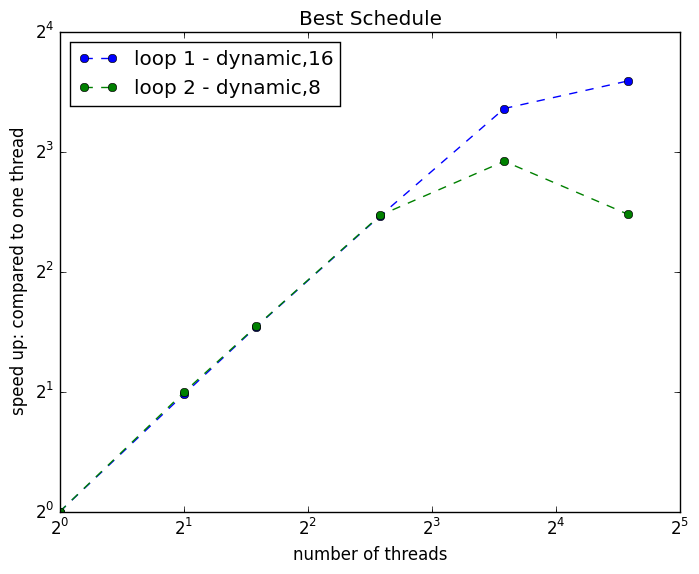

In [15]:
loglog(P1_byT[5],P1_byT[1],basex = 2,basey =2,linestyle = "--",marker = "o",label = "loop 1 - dynamic,16")
loglog(P1_byT[5],P1_byT[2],basex = 2,basey =2,linestyle = "--",marker = "o",label = "loop 2 - dynamic,8")
title("Best Schedule")
legend(loc = 0)
ylabel("speed up: compared to one thread")
xlabel("number of threads")
savefig("Best Schedules.eps")

In [28]:
affinity_gcc_s2 = readtable("affinityresults.txt",header = false)
P1_byT = readtable("thread_res.txt",header = false)

,x1,x2,x3,x4,x5
1,0.395122,20.658573,-34302.1474765774,-2.524264460320227e6,1
2,0.200834,10.377893,-34302.1474765774,-2.524264460320227e6,2
3,0.135814,7.081942,-34302.1474765774,-2.524264460320227e6,3
4,0.071545,3.728483,-34302.1474765774,-2.524264460320227e6,6
5,0.038496,2.729788,-34302.1474765774,-2.524264460320227e6,12
6,0.032814,3.710874,-34302.1474765774,-2.524264460320227e6,24


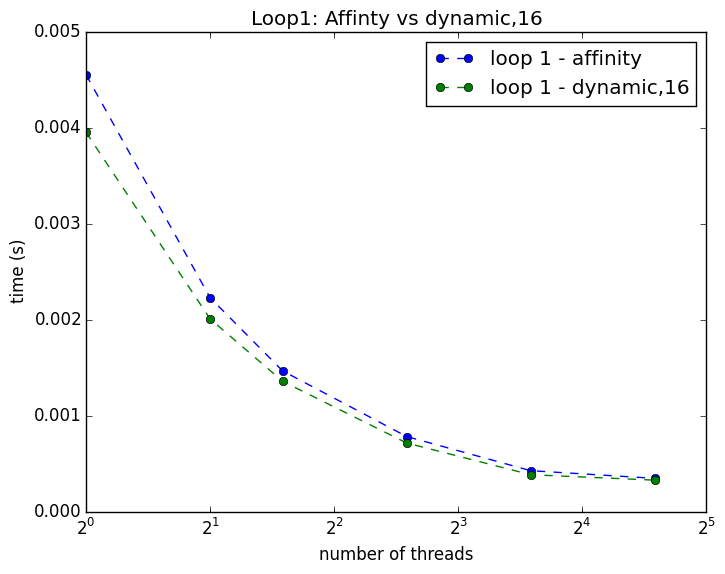

In [41]:
semilogx(affinity_gcc_s2[3],affinity_gcc_s2[1],basex =2, linestyle = "--",marker = "o",label = "loop 1 - affinity")
semilogx(P1_byT[5],P1_byT[1]/100,basex = 2,linestyle = "--",marker = "o",label = "loop 1 - dynamic,16")
title("Loop1: Affinty vs dynamic,16")
legend(loc = 0)
ylabel("time (s)")
xlabel("number of threads")
savefig("L1afvdyn16.eps")

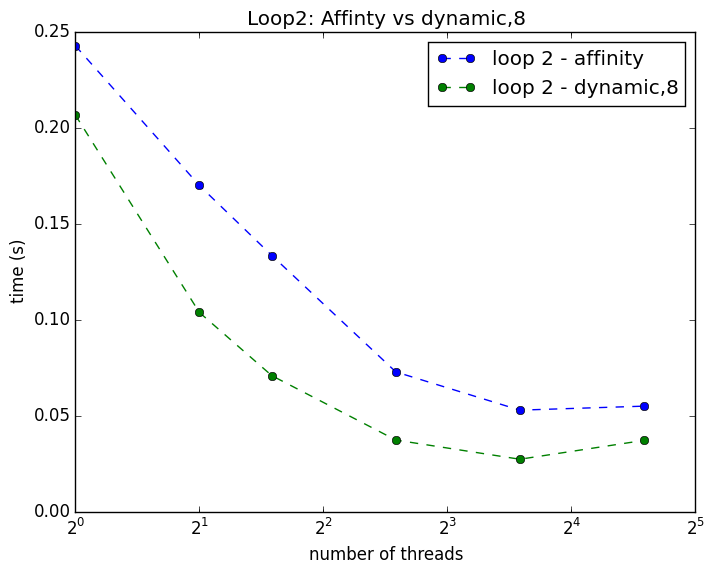

In [40]:
semilogx(affinity_gcc_s2[3],affinity_gcc_s2[2],basex =2, linestyle = "--",marker = "o",label = "loop 2 - affinity")
semilogx(P1_byT[5],P1_byT[2]/100,basex = 2,linestyle = "--",marker = "o",label = "loop 2 - dynamic,8")
title("Loop2: Affinty vs dynamic,8")
legend(loc = 0)
ylabel("time (s)")
xlabel("number of threads")
savefig("L2afvdyn8.eps")

In [17]:
affinity_gcc_s2[1] = affinity_gcc_s2[1,1]./affinity_gcc_s2[1]
affinity_gcc_s2[2] = affinity_gcc_s2[1,2]./affinity_gcc_s2[2]
affinity_gcc_s2

,x1,x2,x3,x4,x5
1,1.0,1.0,1,-343.0214747657,-25242.6446031986
2,2.0416785519478835,1.4283931708694437,2,-343.0214747657,-25242.6446031986
3,3.1034374562909375,1.8192642018084995,3,-343.0214747657,-25242.6446031986
4,5.813729069756152,3.3349991302640056,6,-343.0214747657,-25242.6446031986
5,10.658069174490393,4.590441131840088,12,-343.0214747657,-25242.6446031986
6,13.116154553393608,4.416588215277171,24,-343.0214747657,-25242.6446031986


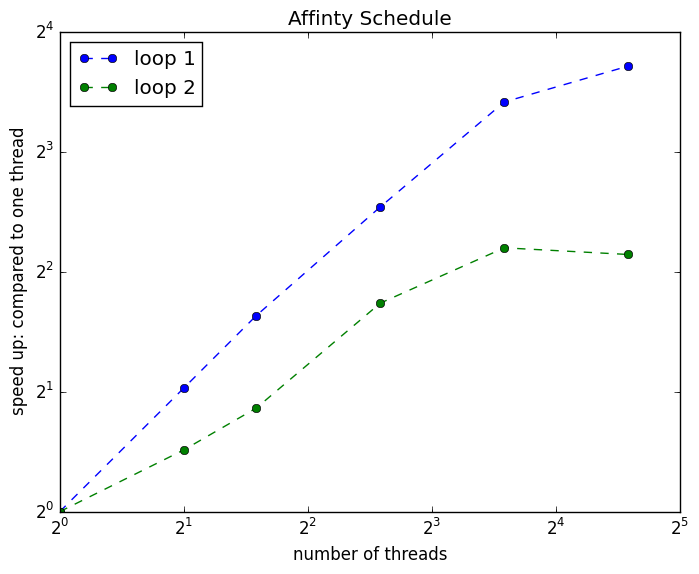

In [18]:
loglog(affinity_gcc_s2[3],affinity_gcc_s2[1],basex =2,basey = 2, linestyle = "--",marker = "o",label = "loop 1")
loglog(affinity_gcc_s2[3],affinity_gcc_s2[2],basex = 2,basey = 2, linestyle = "--",marker = "o",label = "loop 2")
title("Affinty Schedule")
legend(loc = 0)
ylabel("speed up: compared to one thread")
xlabel("number of threads")
savefig("Affinty Schedule.eps")

In [19]:
;ls

Affinty Schedule.eps
Best Schedules.eps
Untitled.ipynb
affinityresults.txt
ccresults.txt
gccresults.txt
gccresults2.txt
loop1.eps
loop2.eps
resP1.txt
thread_res.txt
